In [174]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, accuracy_score, f1_score , cohen_kappa_score
import matplotlib.pyplot as plt 
import seaborn as sns 

In [123]:
df = pd.read_excel('./dataset.xls')

In [124]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [125]:
df.columns = ['customer', 'agent', 'sales_agent_emailID', 'contact_emailID', 'stage', \
       'product', 'close_value', 'created_date', 'close_date']

In [126]:
won_mean = df[df.stage=='Won'].close_value.mean()
lost_mean = df[df.stage=='Lost'].close_value.mean()
overall_mean = df.close_value.mean()


df.loc[(df.close_value.isna()) & (df.stage=='Won') ,'close_value'] = won_mean
df.loc[(df.close_value.isna()) & (df.stage=='Lost') ,'close_value'] = lost_mean
df.loc[(df.close_value.isna()) & (df.stage=='In Progress') ,'close_value'] = overall_mean

In [127]:
df.drop(['customer', 'agent','sales_agent_emailID', 'contact_emailID' ], axis=1, inplace=True)


In [128]:
df = df[df.stage!='In Progress']

In [129]:
df = df.join(pd.get_dummies(df['product'])).drop('product', axis=1)

In [130]:
df['diff_months'] = (df.close_date - df.created_date).dt.components.days/30.0

In [131]:
df.drop(['created_date', 'close_date'], axis=1, inplace=True)

In [132]:
df

,stage,close_value,GTK 500,GTX Basic,GTX Plus Basic,GTX Plus Pro,GTXPro,MG Advanced,MG Special,diff_months
0,Won,1255.000000,0,0,1,0,0,0,0,4.700000
1,Won,45.000000,0,0,0,0,0,0,1,10.100000
2,Lost,1335.458057,0,0,0,0,0,0,1,11.200000
4,Won,3180.000000,0,0,0,0,0,1,0,0.800000
5,Won,517.000000,0,1,0,0,0,0,0,11.166667
...,...,...,...,...,...,...,...,...,...,...
7293,Won,5085.000000,0,0,0,0,1,0,0,0.533333
7294,Won,555.000000,0,1,0,0,0,0,0,8.033333
7297,Lost,5169.000000,0,0,0,1,0,0,0,6.366667
7298,Won,4880.000000,0,0,0,1,0,0,0,1.233333


In [133]:
x_train,x_test , y_train,y_test = train_test_split(df.drop('stage', axis=1), df.stage, stratify= df.stage,\
                                                   test_size=0.2, random_state=101)

# Random Forest Classifier

In [134]:
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(x_train, y_train)


RandomForestClassifier(class_weight='balanced')

In [135]:
y_pred = clf.predict(x_test)

In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Lost       0.96      0.89      0.93       395
         Won       0.94      0.98      0.96       748

    accuracy                           0.95      1143
   macro avg       0.95      0.94      0.94      1143
weighted avg       0.95      0.95      0.95      1143



In [137]:
features = dict(zip(x_train.columns,clf.feature_importances_)) 
features = dict(sorted(features.items(), key=lambda item: item[1], reverse=True))

In [138]:
features

{'close_value': 0.6812851590997643,
 'diff_months': 0.13150340583881487,
 'MG Advanced': 0.036018261899414934,
 'MG Special': 0.03298965249716059,
 'GTXPro': 0.03155941526742719,
 'GTX Basic': 0.030808786033514994,
 'GTX Plus Basic': 0.030125982474767013,
 'GTX Plus Pro': 0.02394069423025772,
 'GTK 500': 0.0017686426588784303}

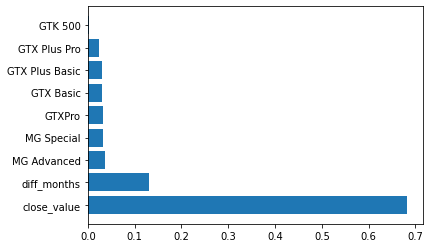

In [139]:
fig = plt.barh(list(features.keys()),list(features.values()))

# Decision Tree Classifer

In [140]:
dsc = DecisionTreeClassifier()
dsc.fit(x_train, y_train)

DecisionTreeClassifier()

In [142]:
y_pred = dsc.predict(x_test)

In [143]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Lost       0.96      0.94      0.95       395
         Won       0.97      0.98      0.97       748

    accuracy                           0.96      1143
   macro avg       0.96      0.96      0.96      1143
weighted avg       0.96      0.96      0.96      1143



# K Neighbors classifier

In [145]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [158]:
from datetime import datetime

In [167]:
st = datetime.now()
y_pred = knn.predict(x_test)
datetime.now() - st 

datetime.timedelta(microseconds=58001)

In [168]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Lost       0.85      0.90      0.87       395
         Won       0.94      0.92      0.93       748

    accuracy                           0.91      1143
   macro avg       0.90      0.91      0.90      1143
weighted avg       0.91      0.91      0.91      1143



# Naive bayes

In [170]:
nbc = MultinomialNB()
nbc.fit(x_train,y_train)

MultinomialNB()

In [171]:
y_pred = nbc.predict(x_test)

In [172]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Lost       0.43      0.63      0.51       395
         Won       0.74      0.57      0.64       748

    accuracy                           0.59      1143
   macro avg       0.59      0.60      0.58      1143
weighted avg       0.64      0.59      0.60      1143



### I choose random forest classifier because it is robust to outliers (such as GTK 500) and it's performance is good.

In [173]:
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [175]:
y_pred = clf.predict(x_test)

In [181]:
le = LabelEncoder()
le.fit(y_test)

LabelEncoder()

## Because dataset is imbalanced, f1 measure is better than accuracy
### I think cohen kappa is better than f1-score, but it was not in measurements!

In [176]:
print(accuracy_score(y_test,y_pred))

0.9501312335958005


In [182]:
print(f1_score(le.transform(y_test), le.transform(y_pred)))

0.9625738673670388


<AxesSubplot:xlabel='stage', ylabel='count'>

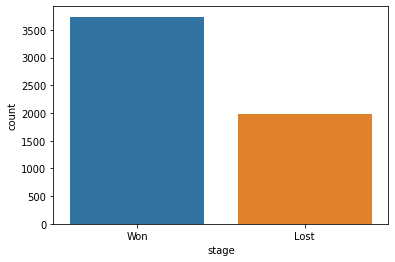

In [193]:
sns.countplot(data=df, x='stage')

In [195]:
cohen_kappa_score(y_pred,y_test)

0.8879390562944948

In [197]:
import joblib

In [198]:
joblib.dump(clf, './best_model.joblib')

['./best_model.joblib']